# Decision function and predict_proba
Some classifier has thewe two methods. Here, we try them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# create a Binary-Class Classification.
x = np.array([[2, 1.5], [-2, -1], [-1, -1], [2, 1], [1, 5], [0.5, 0.5], [-2, 0.5]])
y = np.array([0, 0, 1, 1, 1, 1, 0])

# Training set
x_train = np.array([[2, 1.5], [-2, -1], [-1, -1], [2, 1]])
y_train = np.array([0, 0, 1, 1])

# Test set
x_test = np.array([[1, 5], [0.5, 0.5], [-2, 0.5]])
y_test = np.array([1, 1, 0])

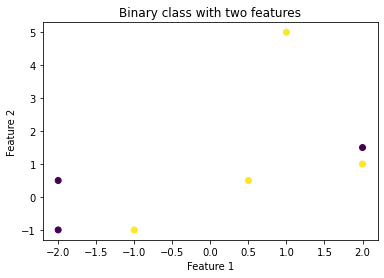

In [3]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.title('Binary class with two features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Learn the data

In [4]:
from sklearn.svm import SVC
# since we later call predict_proba()
# we should set probability=True

model = SVC(probability=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
Decision_Function = model.decision_function(x_test)

print('Classes:', model.classes_)
print('Accuracy of the model is:', model.score(x_test, y_test))
print('Actual Output is:', y_test)
print('Predicted Values from Classifier:', y_pred)
print('Output of Decision Function is:', Decision_Function)

Classes: [0 1]
Accuracy of the model is: 0.6666666666666666
Actual Output is: [1 1 0]
Predicted Values from Classifier: [0 1 0]
Output of Decision Function is: [-0.04274893  0.29143233 -0.13001369]


In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [6]:
print('Predict probability of Classifier:\n', model.predict_proba(x_test))

Predict probability of Classifier:
 [[0.48743434 0.51256566]
 [0.58029498 0.41970502]
 [0.46297971 0.53702029]]


## <span style='color:red'> Problem: </span>
It seems that the results of decision_function and predict_proba are not self-consistent. Results show that the prediction is based on Decision_function not predict_proba. Our guess is that the training data set is small then We try bigger dataset as Iris below.

In [7]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Loading Iris data
iris = datasets.load_iris()
X_iris = iris.data[:, [0, 2]]
print('shape of data:',X_iris.shape)
y_iris = iris.target
y_iris_two = [y_iris==0]

shape of data: (150, 2)


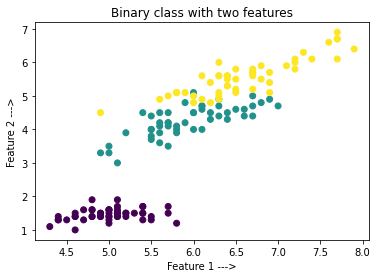

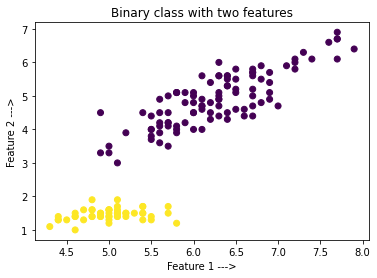

In [25]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c = y_iris)
plt.xlabel('Feature 1 --->')
plt.ylabel('Feature 2 --->')
plt.title('Binary class with two features')
plt.show()

plt.scatter(X_iris[:, 0], X_iris[:, 1], c = y_iris_two)
plt.xlabel('Feature 1 --->')
plt.ylabel('Feature 2 --->')
plt.title('Binary class with two features')
plt.show()

In [9]:
y_iris_two = np.array(y_iris_two)[0,:]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris_two, test_size=0.3, random_state=0)

In [11]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Decision_Function = model.decision_function(X_test)
pred_prob = model.predict_proba(X_test)

print('Classes:', model.classes_)
#print('Accuracy of the model is:', model.score(X_test, y_test))
print('Actual Output is:', y_test)
print('Predicted Values from Classifier:', y_pred)
print('Output of Decision Function is:', Decision_Function)
print('Output of Decision Function is:', pred_prob)

Classes: [False  True]
Actual Output is: [False False  True False  True False  True False False False False False
 False False False  True False False  True  True False False  True  True
 False  True  True False False  True False False  True False False False
  True False False False False  True False  True  True]
Predicted Values from Classifier: [False False  True False  True False  True False False False False False
 False False False  True False False  True  True False False  True  True
 False  True  True False False  True False False  True False False False
  True False False False False  True False  True  True]
Output of Decision Function is: [-1.41162905 -1.28150821  1.20370232 -1.0803827   1.13239899 -1.16601812
  1.24646598 -1.26921374 -1.24739988 -1.26059136 -1.27224397 -1.33010453
 -1.41311309 -1.31545361 -1.41311309  1.17755417 -1.42077984 -1.47334056
  1.15604283  1.26331366 -1.45962387 -1.47661511  0.76183571  1.02765508
 -1.39258492  1.24355235  0.80488801 -1.34210656 -0

We can see that the problem is solved when we train a bigger dataset.